In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import datetime
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, preprocessing, cross_validation, feature_extraction
from sklearn import linear_model, svm, metrics, ensemble, neighbors, mixture, cluster
import time
from datetime import date

In [32]:
acc_daily = pd.read_csv('data_files/CPU_RAM_jun2nov_dat.csv')

In [33]:
acc_daily.head()

,Unnamed: 0,Date,CPU_usage,RAM Used
0,0,2016-06-01,138421.9936,1350.859649
1,1,2016-06-02,149166.1728,1351.493314
2,2,2016-06-03,159469.8752,1378.649846
3,3,2016-06-04,113038.4384,1326.211734
4,4,2016-06-05,167035.7120,1336.246268


In [34]:
acc_daily.drop(acc_daily.columns[[0]], axis=1, inplace=True)

In [35]:
acc_daily.head()

,Date,CPU_usage,RAM Used
0,2016-06-01,138421.9936,1350.859649
1,2016-06-02,149166.1728,1351.493314
2,2016-06-03,159469.8752,1378.649846
3,2016-06-04,113038.4384,1326.211734
4,2016-06-05,167035.7120,1336.246268


In [36]:
acc_daily.dtypes

Date          object
CPU_usage    float64
RAM Used     float64
dtype: object

In [37]:
acc_daily.shape

(183, 3)

In [38]:
acc_daily.sort('Date')

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Date,CPU_usage,RAM Used
0,2016-06-01,138421.9936,1350.859649
1,2016-06-02,149166.1728,1351.493314
2,2016-06-03,159469.8752,1378.649846
3,2016-06-04,113038.4384,1326.211734
4,2016-06-05,167035.7120,1336.246268
5,2016-06-06,150988.5376,1319.412186
6,2016-06-07,137653.3184,1320.192935
7,2016-06-08,127712.3616,1311.735929
8,2016-06-09,135217.7408,1316.324410
9,2016-06-10,153683.2192,1314.106956


In [39]:
acc_daily["RAM Next Day"] = acc_daily.loc[1:182, "RAM Used"]

In [40]:
acc_daily.head()

,Date,CPU_usage,RAM Used,RAM Next Day
0,2016-06-01,138421.9936,1350.859649,NaN
1,2016-06-02,149166.1728,1351.493314,1351.493314
2,2016-06-03,159469.8752,1378.649846,1378.649846
3,2016-06-04,113038.4384,1326.211734,1326.211734
4,2016-06-05,167035.7120,1336.246268,1336.246268


In [41]:
temp=acc_daily.loc[1:182, "RAM Used"]

In [42]:
temp=temp.reset_index()

In [43]:
temp.drop(temp.columns[[0]], axis=1, inplace=True)

In [44]:
temp.loc[182] = 0

In [45]:
acc_daily.drop(acc_daily.columns[[3]], axis=1, inplace=True)

In [46]:
acc_daily['RAM Next Day'] = temp

In [47]:
rows, cols = acc_daily.shape

In [48]:
divider = rows - 30
train_df = acc_daily.drop(acc_daily.columns[[1]], axis=1)

In [49]:
acc_daily['Date'] = pd.to_datetime(acc_daily['Date'], yearfirst=True)

In [50]:
x=acc_daily.loc[0, 'Date']

In [51]:
acc_daily['date_delta'] = (acc_daily['Date'] - acc_daily['Date'].min())  / np.timedelta64(1,'D')

In [52]:
acc_daily.head()

,Date,CPU_usage,RAM Used,RAM Next Day,date_delta
0,2016-06-01,138421.9936,1350.859649,1351.493314,0.0
1,2016-06-02,149166.1728,1351.493314,1378.649846,1.0
2,2016-06-03,159469.8752,1378.649846,1326.211734,2.0
3,2016-06-04,113038.4384,1326.211734,1336.246268,3.0
4,2016-06-05,167035.7120,1336.246268,1319.412186,4.0


In [53]:
acc_daily['Date'] = acc_daily['date_delta']

In [54]:
acc_daily.drop(acc_daily.columns[[4]], axis=1, inplace=True)

In [55]:
train_df.head()

,Date,RAM Used,RAM Next Day
0,2016-06-01,1350.859649,1351.493314
1,2016-06-02,1351.493314,1378.649846
2,2016-06-03,1378.649846,1326.211734
3,2016-06-04,1326.211734,1336.246268
4,2016-06-05,1336.246268,1319.412186


In [56]:
train_data = train_df.iloc[:divider, 0:2]
train_label = train_df.iloc[:divider, 2]

In [57]:
test_data = train_df.iloc[divider:rows-1, 0:2]
test_label = train_df.iloc[divider:rows-1, 2]

In [7]:
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, preprocessing, cross_validation, feature_extraction
from sklearn import linear_model, svm, metrics, ensemble, neighbors, mixture, cluster
import time
from datetime import date

In [59]:
fold_results = pd.DataFrame()
foldnum = 0

lr = linear_model.LinearRegression()
lr.fit(train_data, train_label)
# We could print out our results
acc = lr.score(test_data, test_label)
mo = metrics.mean_squared_error(test_label, lr.predict(test_data))
print ("R^2 metric = %03.3f \t\t MSE = %03.1f " % (acc, mo))

# But a nicer way to store them is in a DataFrame
fold_results.loc[foldnum, 'R^2'] = acc
fold_results.loc[foldnum, 'MSE'] = mo
    
#Now let's look at the results:
print (fold_results)
#And compute the mean error across folds:
print (fold_results.mean())

ValueError: could not convert string to float: '2016-10-31'

In [2]:
acc_daily2 = pd.read_csv('data_files/acc_CPU_RAM_jun2nov_hourly_data.csv')
acc_daily2.drop(acc_daily2.columns[[1,2]], axis=1, inplace=True)
acc_daily2.columns = ['Date', 'RAM Used']
rows, cols = acc_daily2.shape
temp=acc_daily2.loc[1:rows-1, "RAM Used"]
temp=temp.reset_index()
temp.drop(temp.columns[[0]], axis=1, inplace=True)
temp.loc[rows-1] = 0
acc_daily2['RAM Next Day'] = temp
diff = int(rows/6)
divider = rows - diff
train_data = acc_daily2.iloc[:divider, 0:2]
train_label = acc_daily2.iloc[:divider, 2]
test_data = acc_daily2.iloc[divider:rows-1, 0:2]
test_label = acc_daily2.iloc[divider:rows-1, 2]
fold_results = pd.DataFrame()
foldnum = 0

lr = linear_model.LinearRegression()
lr.fit(train_data, train_label)
# We could print out our results
acc = lr.score(test_data, test_label)
mo = metrics.mean_squared_error(test_label, lr.predict(test_data))
print ("R^2 metric = %03.3f \t\t MSE = %03.1f " % (acc, mo))

# But a nicer way to store them is in a DataFrame
fold_results.loc[foldnum, 'R^2'] = acc
fold_results.loc[foldnum, 'MSE'] = mo
    
#Now let's look at the results:
print (fold_results)
#And compute the mean error across folds:
print (fold_results.mean())

OSError: File b'data_files/acc_CPU_RAM_jun2nov_hourly_data.csv' does not exist

In [3]:
acc_daily2 = pd.read_csv('data_files/CPU_RAM_jun2nov_data.csv')
acc_daily2.drop(acc_daily2.columns[[1,2]], axis=1, inplace=True)
acc_daily2.columns = ['Date', 'RAM Used']
rows, cols = acc_daily2.shape
temp=acc_daily2.loc[1:rows-1, "RAM Used"]
temp=temp.reset_index()
temp.drop(temp.columns[[0]], axis=1, inplace=True)
temp.loc[rows-1] = 0
acc_daily2['RAM Next Day'] = temp
diff = int(rows/6)
divider = rows - diff
train_data = acc_daily2.iloc[:divider, 0:2]
train_label = acc_daily2.iloc[:divider, 2]
test_data = acc_daily2.iloc[divider:rows-1, 0:2]
test_label = acc_daily2.iloc[divider:rows-1, 2]
fold_results = pd.DataFrame()
foldnum = 0

lr = linear_model.LinearRegression()
lr.fit(train_data, train_label)
# We could print out our results
acc = lr.score(test_data, test_label)
mo = metrics.mean_squared_error(test_label, lr.predict(test_data))
print ("R^2 metric = %03.3f \t\t MSE = %03.1f " % (acc, mo))

# But a nicer way to store them is in a DataFrame
fold_results.loc[foldnum, 'R^2'] = acc
fold_results.loc[foldnum, 'MSE'] = mo
    
#Now let's look at the results:
print (fold_results)
#And compute the mean error across folds:
print (fold_results.mean())

dates=range(divider,divider+diff-1,1)
prediction=pd.DataFrame()
prediction['Date']=dates
prediction['Pred']=lr.predict(test_data)
plt.figure()
ax=acc_daily2.plot(x='Date', y='RAM Used')
prediction.plot(x='Date', y='Pred',ax=ax)
plt.show()

OSError: File b'data_files/CPU_RAM_jun2nov_data.csv' does not exist

In [8]:
def linearRegressionRAM(filename):
    acc_daily2 = pd.read_csv(filename)
    acc_daily2.drop(acc_daily2.columns[[1,2]], axis=1, inplace=True)
    acc_daily2.columns = ['Date', 'RAM Used']
    rows, cols = acc_daily2.shape
    temp=acc_daily2.loc[1:rows-1, "RAM Used"]
    temp=temp.reset_index()
    temp.drop(temp.columns[[0]], axis=1, inplace=True)
    temp.loc[rows-1] = 0
    acc_daily2['RAM Next Day'] = temp
    diff = int(rows/6)
    divider = rows - diff
    train_data = acc_daily2.iloc[:divider, 0:2]
    train_label = acc_daily2.iloc[:divider, 2]
    test_data = acc_daily2.iloc[divider:rows-1, 0:2]
    test_label = acc_daily2.iloc[divider:rows-1, 2]
    fold_results = pd.DataFrame()
    foldnum = 0

    lr = linear_model.LinearRegression()
    lr.fit(train_data, train_label)
    print(lr.coef_)
    # We could print out our results
    acc = lr.score(test_data, test_label)
    mo = metrics.mean_squared_error(test_label, lr.predict(test_data))
    print ("R^2 metric = %03.3f \t\t MSE = %03.1f " % (acc, mo))

    # But a nicer way to store them is in a DataFrame
    fold_results.loc[foldnum, 'R^2'] = acc
    fold_results.loc[foldnum, 'MSE'] = mo

    #Now let's look at the results:
    print (fold_results)
    #And compute the mean error across folds:
    print (fold_results.mean())

    dates=range(divider,divider+diff-1,1)
    prediction=pd.DataFrame()
    prediction['Date']=dates
    prediction['Pred']=lr.predict(test_data)
    plt.figure()
    ax=acc_daily2.plot(x='Date', y='RAM Used')
    prediction.plot(x='Date', y='Pred',ax=ax)
    plt.show()

[ 0.0161138   0.86230341]
R^2 metric = 0.146 		 MSE = 213971.8 
        R^2            MSE
0  0.146304  213971.774996
R^2         0.146304
MSE    213971.774996
dtype: float64


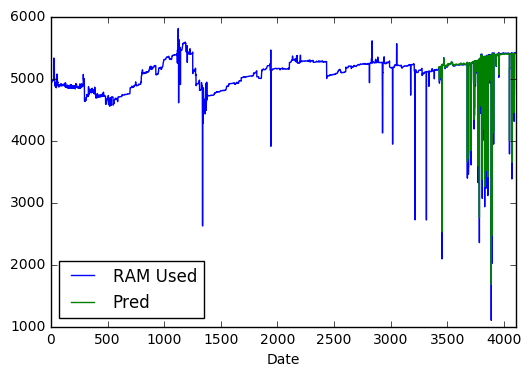

In [9]:
linearRegressionRAM(filename='data_files/AMD/AMD_CPU_RAM_jun2nov_hourly_data.csv')

R^2 metric = 0.931 		 MSE = 372.7 
        R^2         MSE
0  0.931207  372.731962
R^2      0.931207
MSE    372.731962
dtype: float64


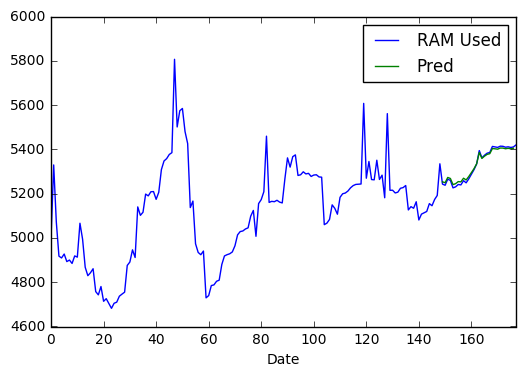

In [116]:
linearRegressionRAM(filename='data_files/AMD/CPU_RAM_jun2nov_data.csv')

In [146]:
def linearRegressionCPU(filename):
    acc_daily2 = pd.read_csv(filename)
    acc_daily2.drop(acc_daily2.columns[[1,3]], axis=1, inplace=True)
    acc_daily2.columns = ['Date', 'CPU Used']
    rows, cols = acc_daily2.shape
    temp=acc_daily2.loc[1:rows-1, "CPU Used"]
    temp=temp.reset_index()
    temp.drop(temp.columns[[0]], axis=1, inplace=True)
    temp.loc[rows-1] = 0
    acc_daily2['CPU Next Day'] = temp
    diff = int(rows/6)
    divider = rows - diff
    train_data = acc_daily2.iloc[:divider, 0:2]
    train_label = acc_daily2.iloc[:divider, 2]
    test_data = acc_daily2.iloc[divider:rows-1, 0:2]
    test_label = acc_daily2.iloc[divider:rows-1, 2]
    fold_results = pd.DataFrame()
    foldnum = 0

    lr = linear_model.LinearRegression()
    lr.fit(train_data, train_label)
    print(lr.coef_)
    print(lr.residues_)
    print(lr.intercept_)
    # We could print out our results
    acc = lr.score(test_data, test_label)
    mo = metrics.mean_squared_error(test_label, lr.predict(test_data))
    print ("R^2 metric = %03.3f \t\t MSE = %03.1f " % (acc, mo))

    # But a nicer way to store them is in a DataFrame
    fold_results.loc[foldnum, 'R^2'] = acc
    fold_results.loc[foldnum, 'MSE'] = mo

    #Now let's look at the results:
    print (fold_results)
    #And compute the mean error across folds:
    print (fold_results.mean())

    dates=range(divider,divider+diff-1,1)
    prediction=pd.DataFrame()
    prediction['Date']=dates
    prediction['Pred']=lr.predict(test_data)
    print(prediction.head())
    print(test_data.head())
    print(test_label.head())
    plt.figure()
    ax=acc_daily2.plot(x='Date', y='CPU Used')
    prediction.plot(x='Date', y='Pred',ax=ax)
    plt.show()

[-0.21963824  0.87816576]
R^2 metric = 0.349 		 MSE = 309001942.5 
        R^2           MSE
0  0.349305  3.090019e+08
R^2    3.493050e-01
MSE    3.090019e+08
dtype: float64


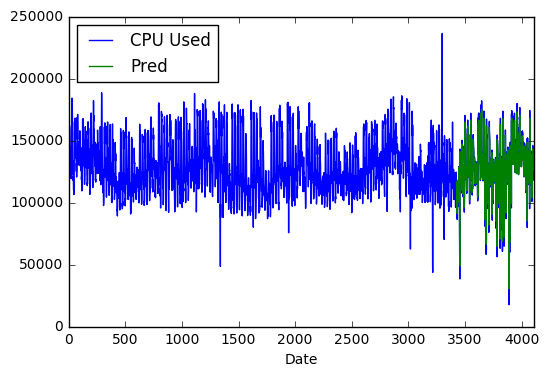

In [129]:
linearRegressionCPU(filename='data_files/AMD/AMD_CPU_RAM_jun2nov_hourly_data.csv')

[-70.19420802   0.14484498]
R^2 metric = -0.225 		 MSE = 218635312.1 
       R^2           MSE
0 -0.22517  2.186353e+08
R^2   -2.251699e-01
MSE    2.186353e+08
dtype: float64


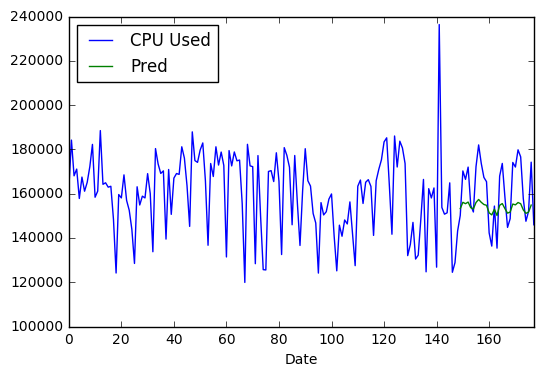

In [130]:
linearRegressionCPU(filename='data_files/AMD/CPU_RAM_jun2nov_data.csv')

[-0.0037095   0.94813665]
R^2 metric = 0.990 		 MSE = 126.1 
        R^2         MSE
0  0.990282  126.069256
R^2      0.990282
MSE    126.069256
dtype: float64


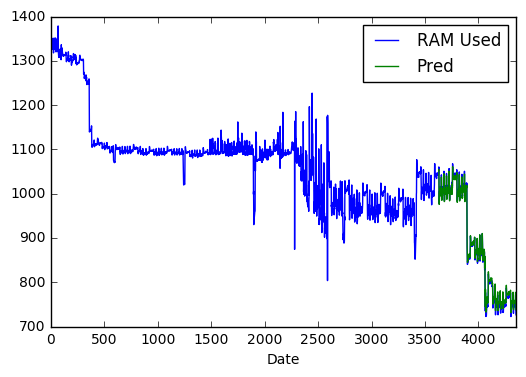

[ 3.28925291  0.68052119]
840417811101.0
26000.8845298
R^2 metric = 0.425 		 MSE = 235947726.9 
        R^2           MSE
0  0.424813  2.359477e+08
R^2    4.248132e-01
MSE    2.359477e+08
dtype: float64
   Date           Pred
0  3629  138772.409405
1  3630  133397.762901
2  3631  137726.910861
3  3632  126127.964939
4  3633  120823.848739
      Date     CPU Used
3629  3629  148172.9408
3630  3630  140270.2688
3631  3631  146626.9536
3632  3632  129577.9104
3633  3633  121778.8800
3629    140270.2688
3630    146626.9536
3631    129577.9104
3632    121778.8800
3633     97967.2224
Name: CPU Next Day, dtype: float64


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


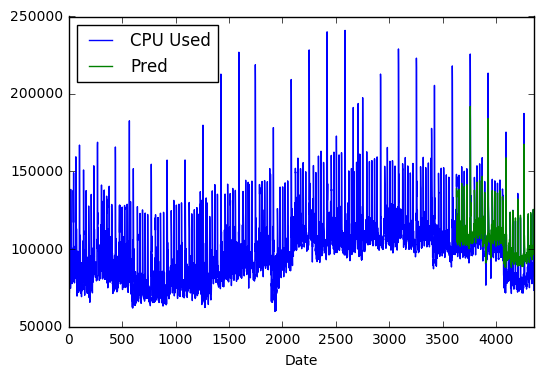

In [147]:
linearRegressionRAM(filename='data_files/acc/acc_CPU_RAM_jun2nov_hourly_data.csv')
linearRegressionCPU(filename='data_files/acc/acc_CPU_RAM_jun2nov_hourly_data.csv')

[-0.21275335  0.81881347]
R^2 metric = 0.835 		 MSE = 2232.6 
        R^2          MSE
0  0.835152  2232.600933
R^2       0.835152
MSE    2232.600933
dtype: float64


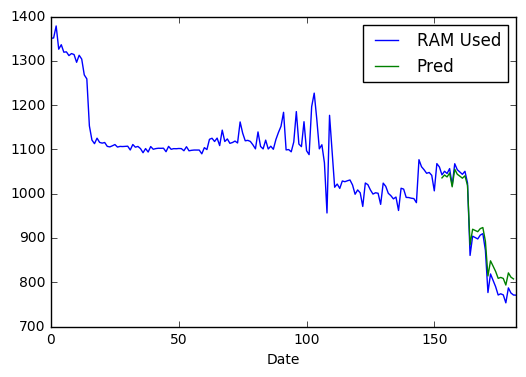

[  3.33645888e+02  -2.81841154e-01]
107977498435.0
164130.36547
R^2 metric = -1.543 		 MSE = 2207611119.8 
        R^2           MSE
0 -1.542804  2.207611e+09
R^2   -1.542804e+00
MSE    2.207611e+09
dtype: float64
   Date           Pred
0   153  173589.782286
1   154  172370.404950
2   155  173526.812358
3   156  173397.959167
4   157  186296.974772
     Date     CPU Used
153   153  147559.7280
154   154  153070.0064
155   155  150150.7680
156   156  151791.7600
157   157  107208.5984
153    153070.0064
154    150150.7680
155    151791.7600
156    107208.5984
157    225783.2256
Name: CPU Next Day, dtype: float64


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


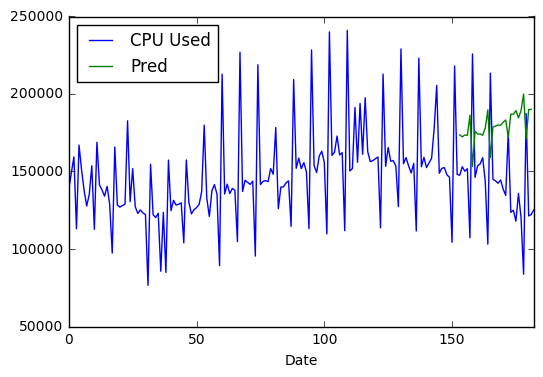

In [148]:
linearRegressionRAM(filename='data_files/acc/CPU_RAM_jun2nov_data.csv')
linearRegressionCPU(filename='data_files/acc/CPU_RAM_jun2nov_data.csv')

[ 0.0161138   0.86230341]
R^2 metric = 0.146 		 MSE = 213971.8 
        R^2            MSE
0  0.146304  213971.774996
R^2         0.146304
MSE    213971.774996
dtype: float64


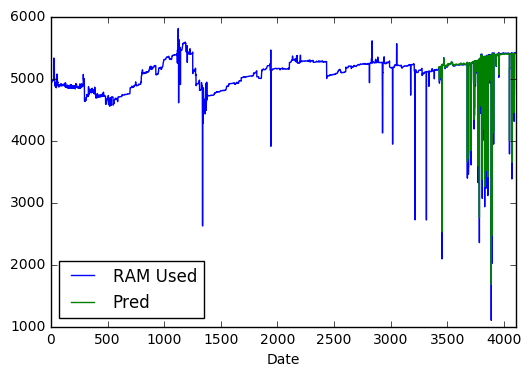

[-0.21963824  0.87816576]
371983846142.0
16037.0127938
R^2 metric = 0.349 		 MSE = 309001942.5 
        R^2           MSE
0  0.349305  3.090019e+08
R^2    3.493050e-01
MSE    3.090019e+08
dtype: float64
   Date           Pred
0  3425  115909.478130
1  3426  107199.933637
2  3427   98219.175025
3  3428   96947.593365
4  3429   99061.030194
      Date     CPU Used
3425  3425  114585.1168
3426  3426  104667.4848
3427  3427   94441.0112
3428  3428   92993.2640
3429  3429   95400.1632
3425    104667.4848
3426     94441.0112
3427     92993.2640
3428     95400.1632
3429    106822.0832
Name: CPU Next Day, dtype: float64


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


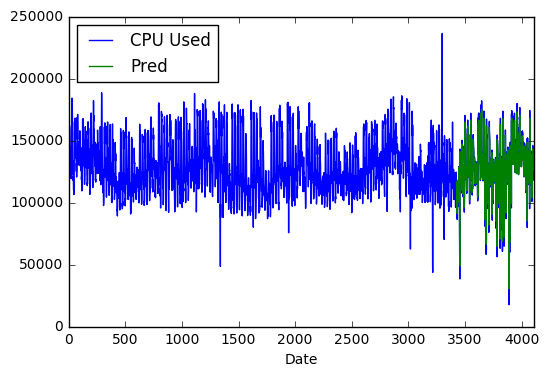

In [149]:
linearRegressionRAM(filename='data_files/AMD/AMD_CPU_RAM_jun2nov_hourly_data.csv')
linearRegressionCPU(filename='data_files/AMD/AMD_CPU_RAM_jun2nov_hourly_data.csv')

[ 0.39411595  0.83959733]
R^2 metric = 0.931 		 MSE = 372.7 
        R^2         MSE
0  0.931207  372.731962
R^2      0.931207
MSE    372.731962
dtype: float64


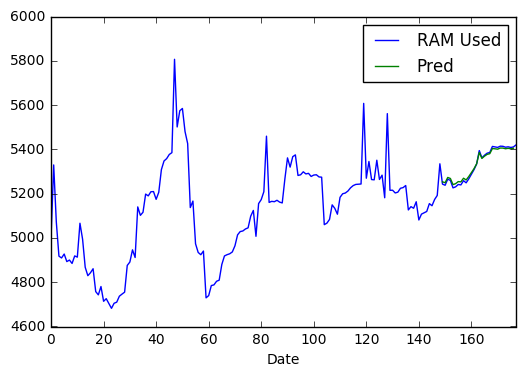

[-70.19420802   0.14484498]
46240571426.1
141950.799358
R^2 metric = -0.225 		 MSE = 218635312.1 
       R^2           MSE
0 -0.22517  2.186353e+08
R^2   -2.251699e-01
MSE    2.186353e+08
dtype: float64
   Date           Pred
0   149  153239.092729
1   150  156082.217249
2   151  155461.227416
3   152  156192.718412
4   153  153628.811876
     Date     CPU Used
149   149  150141.4176
150   150  170254.7744
151   151  166452.1184
152   152  171986.8992
153   153  154770.4768
149    170254.7744
150    166452.1184
151    171986.8992
152    154770.4768
153    151713.9424
Name: CPU Next Day, dtype: float64


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


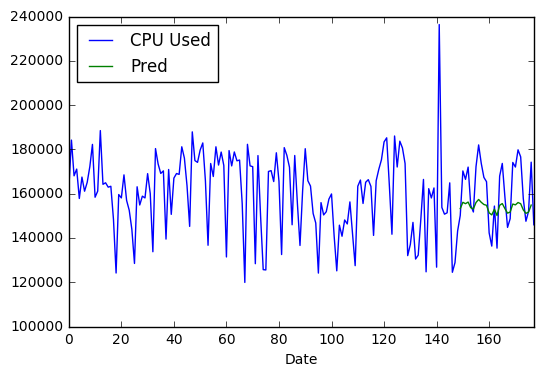

In [150]:
linearRegressionRAM(filename='data_files/AMD/CPU_RAM_jun2nov_data.csv')
linearRegressionCPU(filename='data_files/AMD/CPU_RAM_jun2nov_data.csv')